In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import numpy.ma as ma

import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import box
#import earthpy.spatial as es
#import earthpy.mask as em

# Get the MODIS data
et.data.get_data('cold-springs-modis-h4')

# This download is for the fire boundary
et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))


# Create a path to the pre-fire MODIS h4 data
pre_fire_path = os.path.join("cold-springs-modis-h4",
                             "07_july_2016",
                             "MOD09GA.A2016189.h09v05.006.2016191073856.hdf")

In [2]:
# Open  data  with rioxarray
modis_pre = rxr.open_rasterio(pre_fire_path,
                              masked=True)
type(modis_pre)

list

In [3]:
#  mask_and_scale doesn't work  the way i'd like them to so we won't use it
modis_pre2 = rxr.open_rasterio(pre_fire_path,
                               mask_and_scale=True)

modis_pre_data2 = modis_pre2[1]
modis_pre_data2.sur_refl_b01_1.min(), modis_pre_data2.sur_refl_b01_1.max()

(<xarray.DataArray 'sur_refl_b01_1' ()>
 array(-1000000.)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray 'sur_refl_b01_1' ()>
 array(1.1446e+08)
 Coordinates:
     spatial_ref  int64 0)

In [4]:
#  The first item in the  list is all of the QA data
modis_pre[0]

<xarray.Dataset>
Dimensions:               (band: 1, x: 1200, y: 1200)
Coordinates:
  * y                     (y) float64 4.447e+06 4.446e+06 ... 3.336e+06
  * x                     (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                  (band) int64 1
    spatial_ref           int64 0
Data variables:
    num_observations_1km  (band, y, x) float64 ...
    granule_pnt_1         (band, y, x) float64 ...
    state_1km_1           (band, y, x) float64 ...
    SensorZenith_1        (band, y, x) float64 ...
    SensorAzimuth_1       (band, y, x) float64 ...
    Range_1               (band, y, x) float64 ...
    SolarZenith_1         (band, y, x) float64 ...
    SolarAzimuth_1        (band, y, x) float64 ...
    gflags_1              (band, y, x) float64 ...
    orbit_pnt_1           (band, y, x) float64 ...
Attributes:
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:   No automatic quality assessment is p...
    CHARACTERISTICBINANGULARSIZE1KM:     30.0
    CHARACTERISTICBINANGULARSIZE500M:    15.0
    CHARACTERISTICBINSIZE1KM:            926.625433055556
    CHARACTERISTICBINSIZE500M:           463.312716527778
    CLOUDOPTION:                         MOD09 internally-derived
    COVERAGECALCULATIONMETHOD:           volume
    COVERAGEMINIMUM:                     0.00999999977648258
    DATACOLUMNS1KM:                      1200
    DATACOLUMNS500M:                     2400
    DATAROWS1KM:                         1200
    DATAROWS500M:                        2400
    DAYNIGHTFLAG:                        Day
    DEEPOCEANFLAG:                       Yes
    DESCRREVISION:                       6.1
    EASTBOUNDINGCOORDINATE:              -92.3664205550513
    EQUATORCROSSINGDATE.1:               2016-07-07
    EQUATORCROSSINGDATE.2:               2016-07-07
    EQUATORCROSSINGLONGITUDE.1:          -103.273195919522
    EQUATORCROSSINGLONGITUDE.2:          -127.994803619317
    EQUATORCROSSINGTIME.1:               17:23:36.891214
    EQUATORCROSSINGTIME.2:               19:02:29.990629
    EXCLUSIONGRINGFLAG.1:                N
    FIRSTLAYERSELECTIONCRITERIA:         order of input pointer
    GEOANYABNORMAL:                      False
    GEOESTMAXRMSERROR:                   50.0
    GLOBALGRIDCOLUMNS1KM:                43200
    GLOBALGRIDCOLUMNS500M:               86400
    GLOBALGRIDROWS1KM:                   21600
    GLOBALGRIDROWS500M:                  43200
    GRANULEBEGINNINGDATETIME:            2016-07-07T17:10:00.000000Z
    GRANULEBEGINNINGDATETIMEARRAY:       2016-07-07T17:10:00.000000Z, 2016-07...
    GRANULEDAYNIGHTFLAG:                 Day
    GRANULEDAYNIGHTFLAGARRAY:            Day, Day, Day, Day
    GRANULEDAYOFYEAR:                    189
    GRANULEENDINGDATETIME:               2016-07-07T18:55:00.000000Z
    GRANULEENDINGDATETIMEARRAY:          2016-07-07T17:15:00.000000Z, 2016-07...
    GRANULENUMBERARRAY:                  208, 209, 228, 247, -1, -1, -1, -1, ...
    GRANULEPOINTERARRAY:                 0, 1, 2, -1, -1, -1, -1, -1, -1, -1,...
    GRINGPOINTLATITUDE.1:                29.8360532722546, 39.9999999964079, ...
    GRINGPOINTLONGITUDE.1:               -103.835851753394, -117.486656023174...
    GRINGPOINTSEQUENCENO.1:              1, 2, 3, 4
    HDFEOSVersion:                       HDFEOS_V2.17
    HORIZONTALTILENUMBER:                9
    identifier_product_doi:              10.5067/MODIS/MOD09GA.006
    identifier_product_doi_authority:    http://dx.doi.org
    INPUTPOINTER:                        MOD09GST.A2016189.h09v05.006.2016191...
    KEEPALL:                             No
    L2GSTORAGEFORMAT1KM:                 compact
    L2GSTORAGEFORMAT500M:                compact
    l2g_storage_format_1km:              c

In [5]:
#  The second is the actual reflectanve data and the  QC
modis_pre[1]

<xarray.Dataset>
Dimensions:                (band: 1, x: 2400, y: 2400)
Coordinates:
  * y                      (y) float64 4.448e+06 4.447e+06 ... 3.336e+06
  * x                      (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                   (band) int64 1
    spatial_ref            int64 0
Data variables:
    num_observations_500m  (band, y, x) float64 ...
    sur_refl_b01_1         (band, y, x) float64 ...
    sur_refl_b02_1         (band, y, x) float64 ...
    sur_refl_b03_1         (band, y, x) float64 ...
    sur_refl_b04_1         (band, y, x) float64 ...
    sur_refl_b05_1         (band, y, x) float64 ...
    sur_refl_b06_1         (band, y, x) float64 ...
    sur_refl_b07_1         (band, y, x) float64 ...
    QC_500m_1              (band, y, x) float64 ...
    obscov_500m_1          (band, y, x) float64 ...
    iobs_res_1             (band, y, x) float64 ...
    q_scan_1               (band, y, x) float64 ...
Attributes:
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:   No automatic quality assessment is p...
    CHARACTERISTICBINANGULARSIZE1KM:     30.0
    CHARACTERISTICBINANGULARSIZE500M:    15.0
    CHARACTERISTICBINSIZE1KM:            926.625433055556
    CHARACTERISTICBINSIZE500M:           463.312716527778
    CLOUDOPTION:                         MOD09 internally-derived
    COVERAGECALCULATIONMETHOD:           volume
    COVERAGEMINIMUM:                     0.00999999977648258
    DATACOLUMNS1KM:                      1200
    DATACOLUMNS500M:                     2400
    DATAROWS1KM:                         1200
    DATAROWS500M:                        2400
    DAYNIGHTFLAG:                        Day
    DEEPOCEANFLAG:                       Yes
    DESCRREVISION:                       6.1
    EASTBOUNDINGCOORDINATE:              -92.3664205550513
    EQUATORCROSSINGDATE.1:               2016-07-07
    EQUATORCROSSINGDATE.2:               2016-07-07
    EQUATORCROSSINGLONGITUDE.1:          -103.273195919522
    EQUATORCROSSINGLONGITUDE.2:          -127.994803619317
    EQUATORCROSSINGTIME.1:               17:23:36.891214
    EQUATORCROSSINGTIME.2:               19:02:29.990629
    EXCLUSIONGRINGFLAG.1:                N
    FIRSTLAYERSELECTIONCRITERIA:         order of input pointer
    GEOANYABNORMAL:                      False
    GEOESTMAXRMSERROR:                   50.0
    GLOBALGRIDCOLUMNS1KM:                43200
    GLOBALGRIDCOLUMNS500M:               86400
    GLOBALGRIDROWS1KM:                   21600
    GLOBALGRIDROWS500M:                  43200
    GRANULEBEGINNINGDATETIME:            2016-07-07T17:10:00.000000Z
    GRANULEBEGINNINGDATETIMEARRAY:       2016-07-07T17:10:00.000000Z, 2016-07...
    GRANULEDAYNIGHTFLAG:                 Day
    GRANULEDAYNIGHTFLAGARRAY:            Day, Day, Day, Day
    GRANULEDAYOFYEAR:                    189
    GRANULEENDINGDATETIME:               2016-07-07T18:55:00.000000Z
    GRANULEENDINGDATETIMEARRAY:          2016-07-07T17:15:00.000000Z, 2016-07...
    GRANULENUMBERARRAY:                  208, 209, 228, 247, -1, -1, -1, -1, ...
    GRANULEPOINTERARRAY:                 0, 1, 2, -1, -1, -1, -1, -1, -1, -1,...
    GRINGPOINTLATITUDE.1:                29.8360532722546, 39.9999999964079, ...
    GRINGPOINTLONGITUDE.1:               -103.835851753394, -117.486656023174...
    GRINGPOINTSEQUENCENO.1:              1, 2, 3, 4
    HDFEOSVersion:                       HDFEOS_V2.17
    HORIZONTALTILENUMBER:                9
    identifier_product_doi:              10.5067/MODIS/MOD09GA.006
    identifier_product_doi_authority:    http://dx.doi.org
    INPUTPOINTER:                        MOD09GST.A2016189.h09v05.006.2016191...
    KEEPALL:                             No
    L2GSTORAGEFORMAT1

In [6]:
all_vars = list(modis_pre[1].data_vars.keys())
# Get all  of the  variables with  b0*_1  in the name
all_vars

['num_observations_500m',
 'sur_refl_b01_1',
 'sur_refl_b02_1',
 'sur_refl_b03_1',
 'sur_refl_b04_1',
 'sur_refl_b05_1',
 'sur_refl_b06_1',
 'sur_refl_b07_1',
 'QC_500m_1',
 'obscov_500m_1',
 'iobs_res_1',
 'q_scan_1']

In [7]:
for i in all_vars:
    if "b0" in i:
        print(i)

sur_refl_b01_1
sur_refl_b02_1
sur_refl_b03_1
sur_refl_b04_1
sur_refl_b05_1
sur_refl_b06_1
sur_refl_b07_1


In [8]:
def get_reflectance_bands(xr_array, reflectance_string="b0"):
    """Returns an array of concacted reflectance bands to simplify plotting.

    Parameters
    ----------
    xr_array: xarray DataSet
        The xarray object with the reflectance value in it.
    reflectance_string: string
        String to be used to know a band is a reflectance band. 

    Returns:
        xarray object with all of the reflectance bands.
    """
    all_vars = list(xr_array.data_vars)
    reflectance_bands = [
        item for item in all_vars if reflectance_string in item]

    return xr.concat([xr_array[refl] for refl in reflectance_bands], dim="band")

##  QUESTION
Why  is  the s cale  bar  below  -10000 -> 10000 ??

when i try to adjust th e vmin and max the plot  i  guess looks b etter

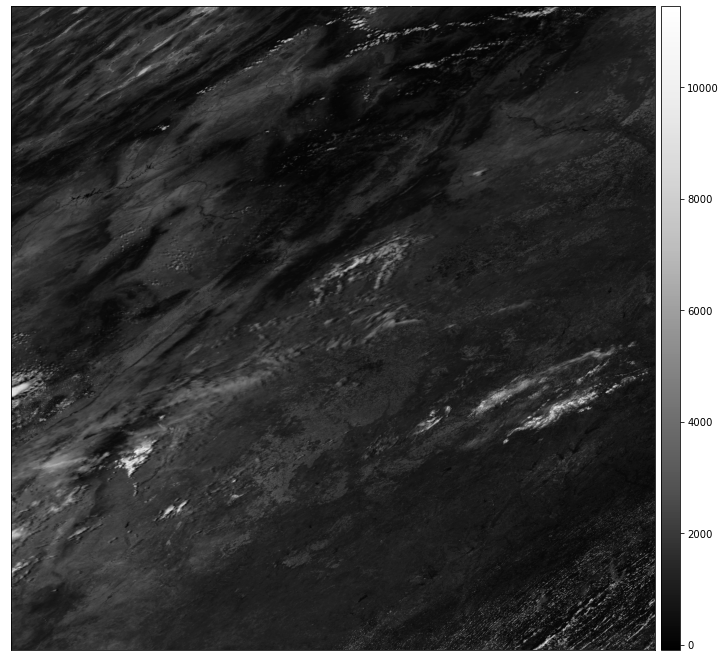

In [9]:
modis_pre_data = modis_pre[1]
# Plot  band one of the data
#  TODO - - this is  odd  because th e smallest  value is actually -100 -
#  why is -10000  on  this  cmap bar?
# Doesn't do this with earthpy plot_bands, only when using inbuilt xarray plot
ep.plot_bands(modis_pre_data.sur_refl_b01_1)
# modis_pre_data.sur_refl_b01_1.plot(cmap="Greys_r",  vmin=-100, vmax=10000)
plt.show()

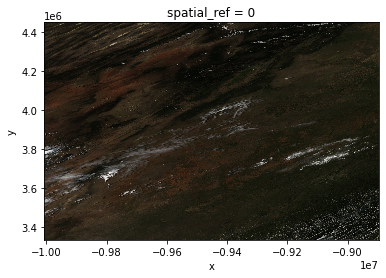

In [10]:
#  TODO --  see if there is a way to stretch the  data easily

# RGB Band index for modis
# 0, 3, 2

# Create an RGB stack for plotting
rgb_bands = xr.concat([modis_pre_data.sur_refl_b01_1,
                       modis_pre_data.sur_refl_b04_1,
                       modis_pre_data.sur_refl_b03_1],
                      dim="band")


# Plot the data. By specifying vmin and max you can control the colormap
rgb_bands.plot.imshow(rgb='band',
                      vmin=-100,
                      vmax=10000)
plt.show()

I  tried this because i wanted to use earthpy stretch
but earthpy doesn't take vmin and max in that function

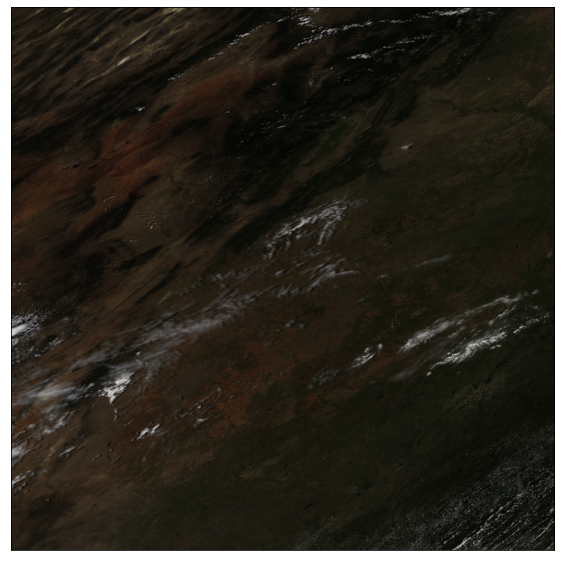

In [11]:
# WTH??? --  we may need to play a  bit with  earthpy  but  for now skipping
# Fixed

modis_pre_reflectance = get_reflectance_bands(modis_pre_data)

modis_pre_reflectance_plot = ma.masked_array(
    modis_pre_reflectance.values, modis_pre_reflectance.isnull())

ep.plot_rgb(modis_pre_reflectance_plot,
            [0, 3, 2])
plt.show()

##  Keys  to loop through bands
it would be nice because i'd like to be able to automate creating a  list of bands to plot them all for   data exploration  purposes.

In [12]:
# How  do i get a list of all
modis_pre_data.data_vars.items()

ItemsView(Data variables:
    num_observations_500m  (band, y, x) float64 ...
    sur_refl_b01_1         (band, y, x) float64 ...
    sur_refl_b02_1         (band, y, x) float64 ...
    sur_refl_b03_1         (band, y, x) float64 ...
    sur_refl_b04_1         (band, y, x) float64 ...
    sur_refl_b05_1         (band, y, x) float64 ...
    sur_refl_b06_1         (band, y, x) float64 ...
    sur_refl_b07_1         (band, y, x) float64 ...
    QC_500m_1              (band, y, x) float64 ...
    obscov_500m_1          (band, y, x) float64 ...
    iobs_res_1             (band, y, x) float64 ...
    q_scan_1               (band, y, x) float64 ...)

## TODO
How do i get a list of keys to automate here?

In [13]:
modis_pre_data.variables.keys()

KeysView(Frozen({'y': <xarray.IndexVariable 'y' (y: 2400)>
array([4447570.422309, 4447107.109592, 4446643.796876, ..., 3337009.840791,
       3336546.528075, 3336083.215358]), 'x': <xarray.IndexVariable 'x' (x: 2400)>
array([-10007323.020642, -10006859.707925, -10006396.395209, ...,
        -8896762.439124,  -8896299.126408,  -8895835.813691]), 'band': <xarray.IndexVariable 'band' (band: 1)>
array([1]), 'spatial_ref': <xarray.Variable ()>
array(0)
Attributes:
    crs_wkt:                         PROJCS["unnamed",GEOGCS["Unknown datum b...
    semi_major_axis:                 6371007.181
    semi_minor_axis:                 6371007.181
    inverse_flattening:              0.0
    reference_ellipsoid_name:        Custom spheroid
    longitude_of_prime_meridian:     0.0
    prime_meridian_name:             Greenwich
    geographic_crs_name:             Unknown datum based upon the custom sphe...
    horizontal_datum_name:           Not specified (based on custom spheroid)
    projected_cr

In [14]:
# I believe the answer to the above two cells is 
list(modis_pre_data.data_vars)

['num_observations_500m',
 'sur_refl_b01_1',
 'sur_refl_b02_1',
 'sur_refl_b03_1',
 'sur_refl_b04_1',
 'sur_refl_b05_1',
 'sur_refl_b06_1',
 'sur_refl_b07_1',
 'QC_500m_1',
 'obscov_500m_1',
 'iobs_res_1',
 'q_scan_1']

## Crop the Data



In [15]:
# Open fire boundary
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# Check the CRS
fire_boundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

<AxesSubplot:>

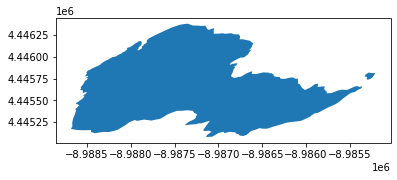

In [16]:
#  let's just reproject the  vector d ata

fire_bound_sin = fire_boundary.to_crs(rgb_bands.rio.crs)

fire_bound_sin.plot()

In [17]:
help(xr.concat)

Help on function concat in module xarray.core.concat:

concat(objs, dim, data_vars='all', coords='different', compat='equals', positions=None, fill_value=<NA>, join='outer', combine_attrs='override')
    Concatenate xarray objects along a new or existing dimension.
    
    Parameters
    ----------
    objs : sequence of Dataset and DataArray
        xarray objects to concatenate together. Each object is expected to
        consist of variables and coordinates with matching shapes except for
        along the concatenated dimension.
    dim : str or DataArray or pandas.Index
        Name of the dimension to concatenate along. This can either be a new
        dimension name, in which case it is added along axis=0, or an existing
        dimension name, in which case the location of the dimension is
        unchanged. If dimension is provided as a DataArray or Index, its name
        is used as the dimension to concatenate along and the values are added
        as a coordinate.
    data

In [18]:
# Play around with the best way to concat the variables!
# xr.concat(modis_pre_data, dim="band", data_vars="all")

In [19]:
#  Because the data come in funky, we need to create an array and then clip that
# Create an RGB stack for plotting

# from shapely.geometry import box, mapping

# rgb_bands = xr.concat([modis_pre_data.sur_refl_b01_1,
#                        modis_pre_data.sur_refl_b04_1,
#                        modis_pre_data.sur_refl_b03_1],
#                       dim="band")

#  Ive tried  this both projected and not projected.

#  This may be failing - band (band) int64 1 1 1  - because if you look at th e
#  Object i t has a value of 1 for each   band  which is   odd
#  GOAL here is to again plot each  band for exploration purposes
rgb_clip = rgb_bands.rio.clip(fire_bound_sin.geometry)

#  TODO  -  figure  out how to plot each band
# rgb_clip.plot(col="band")

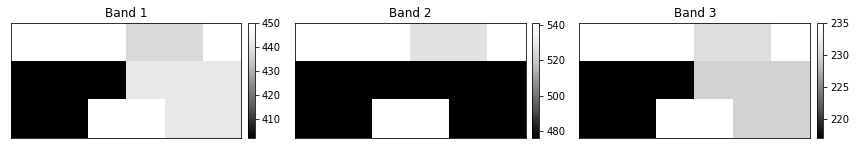

In [20]:
#  Earthpy  does work  here  --
ep.plot_bands(rgb_clip)
plt.show()

In [21]:
# This is what we've ended up using

def stack_modis_bands(modis_path, filter_string=["b0"]):
    """Returns an array of concacted selected bands to simplify plotting.

    Parameters
    ----------
    modis_path: string
        Path to the modis data
    filter_string: list
        List of strings to be used to select certain modis bands. 

    Returns:
        xarray object with all of the reflectance bands.
    """
    modis_qa, modis_data = rxr.open_rasterio(modis_path, masked=True)

    all_vars = list(modis_data.data_vars)
    filtered_bands = [item for item in all_vars if any(
        sub in item for sub in filter_string)]

    modis_filtered = modis_data.squeeze("band").to_array(
        dim="band").sel(band=filtered_bands)

    return modis_filtered

# OR version that includes cropping and masking

def open_clean_modis_bands(modis_path, crop_bound, valid_range=None, filter_string=["b0"]):
    """Returns an array of concacted selected bands to simplify plotting.

    Parameters
    ----------
    modis_path: string
        Path to the modis data
    crop_bound : geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rioxarray clip().
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None
    filter_string: list
        List of strings to be used to select certain modis bands. 

    Returns:
        xarray object with all of the reflectance bands.
    """
    modis_qa, modis_data = rxr.open_rasterio(modis_path, masked=True)

    if crop_bound.crs != modis_data.rio.crs:
        crop_bound = crop_bound.to_crs(modis_data.rio.crs)

    crop_bound_box = [box(*crop_bound.bounds.loc[0])]

    modis_crop = modis_data.rio.clip(
        crop_bound_box, all_touched=True, from_disk=True)

    all_vars = list(modis_crop.data_vars)
    filtered_bands = [item for item in all_vars if any(
        sub in item for sub in filter_string)]

    modis_filtered = modis_crop.squeeze("band").to_array(
        dim="band").sel(band=filtered_bands)

    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((modis_filtered < valid_range[0]) | (
            modis_filtered > valid_range[1]))
        modis_filtered = modis_filtered.where(~xr.where(mask, True, False))

    return modis_filtered

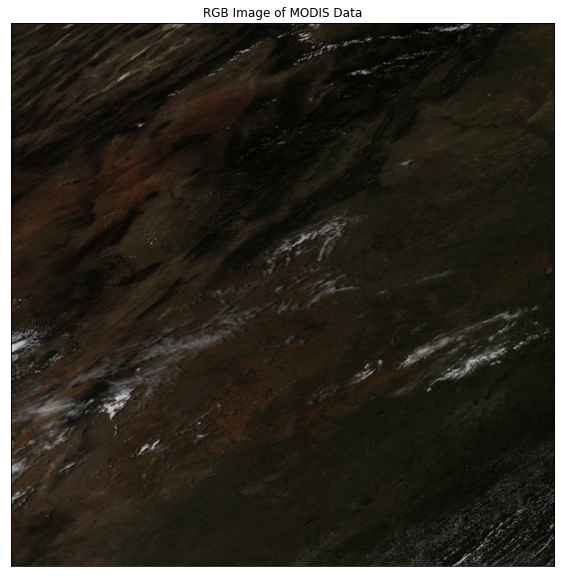

In [22]:
# Version without cropping
desired_bands = ["b01", "b03", "b04"]

modis_full = stack_modis_bands(pre_fire_path, desired_bands)

# To plot you still have to do the masking. 
# Also worth noting: stretch=True does not work for MODIS data, still not sure why.
modis_full_plot = ma.masked_array(
    modis_full.values, modis_full.isnull())

ep.plot_rgb(modis_full_plot,
            rgb=[0, 2, 1],
            title='RGB Image of MODIS Data')

plt.show()

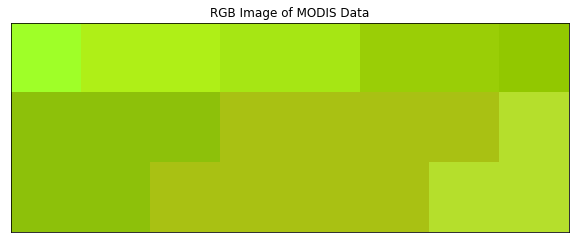

In [23]:
# Cropped function here

modis_crop = open_clean_modis_bands(pre_fire_path, fire_boundary, (0, 10000), desired_bands)

# To plot you still have to do the masking. 
# Also worth noting: stretch=True does not work for MODIS data, still not sure why.
modis_crop_plot = ma.masked_array(
    modis_crop.values, modis_crop.isnull())

ep.plot_rgb(modis_crop_plot,
            rgb=[0, 2, 1],
            title='RGB Image of MODIS Data')

plt.show()

# Final Function that works for MODIS and Landsat

In [24]:
def open_clean_bands(band_path,
                     crop_bound,
                     valid_range=None,
                     variable=None):
    """Open and clean a single landsat band.

    Parameters
    -----------
    band_path : string 
        A path to the array to be opened.
    crop_bound : geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rioxarray clip().
    valid_range:tuple (optional)
        A tuple of min and max range of values for the data. Default = None.
    variable : List
        A list of variables to be opened from the raster.

    Returns
    -----------
    band : xarray DataArray
        Cropped xarray DataArray
    """

    crop_bound_box = [box(*crop_bound.total_bounds)]

    try:
        band = rxr.open_rasterio(band_path,
                                 masked=True,
                                 variable=variable).rio.clip(crop_bound_box,
                                                             crs=crop_bound.crs,
                                                             all_touched=True,
                                                             from_disk=True).squeeze()
    except:
        raise ValueError(
            "Oops - I couldn't clip your data. This may be due to a crs error.")

    # Only mask the data to the valid range if a valid range tuple is provided
    if valid_range is not None:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band

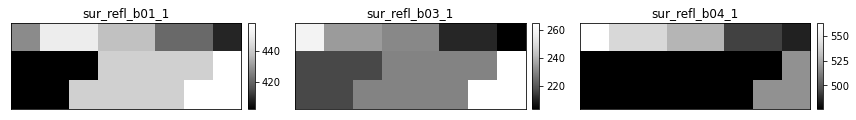

In [25]:
desired_bands = ['sur_refl_b01_1', 'sur_refl_b03_1', 'sur_refl_b04_1']

clean_bands = open_clean_bands(pre_fire_path, fire_bound_sin, (0, 10000), desired_bands)

ep.plot_bands(clean_bands.to_array().values, title=desired_bands)

plt.show()